In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import roc_auc_score
from sklearn.preprocessing import minmax_scale
from sklearn.model_selection import train_test_split
test_size=0.67

In [44]:
h = .02  # step size in the 
classifiers = [
    KNeighborsClassifier(3),
    SVC(kernel="linear", C=0.025),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    DecisionTreeClassifier(max_depth=5),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000),
    AdaBoostClassifier(),
    GaussianNB(),
    QuadraticDiscriminantAnalysis()]

names = ["Nearest Neighbors", "Linear SVM", "RBF SVM", "Gaussian Process",
         "Decision Tree", "Random Forest", "Neural Net", "AdaBoost",
         "Naive Bayes", "QDA"]


#datasets = ["01","03","05","06","07","08","09","10","11","12"]
datasets = ["01","03","06","09","12"]
#datasets = [2,4,6,8]   

In [3]:
from numpy import loadtxt

In [4]:
from numpy import loadtxt


0.9830335769787119
0.9782178471306597
0.9887952994789999
0.9652325298582931
0.960661298787747
0.8634801639038927
0.8739709443099274
0.8800987148444777
0.8693332091637176
0.8655103371205065
0.7407696411898093
0.782733093237295
0.783546752034147
0.7750233426704015
0.767593704148326
0.7023657421406531
0.7453898021430312
0.7450731704275775
0.7427890578135666
0.7370115310056374
0.6732505825851509
0.7022513749368904
0.7043162507568667
0.7103698360137342
0.6953829789910003


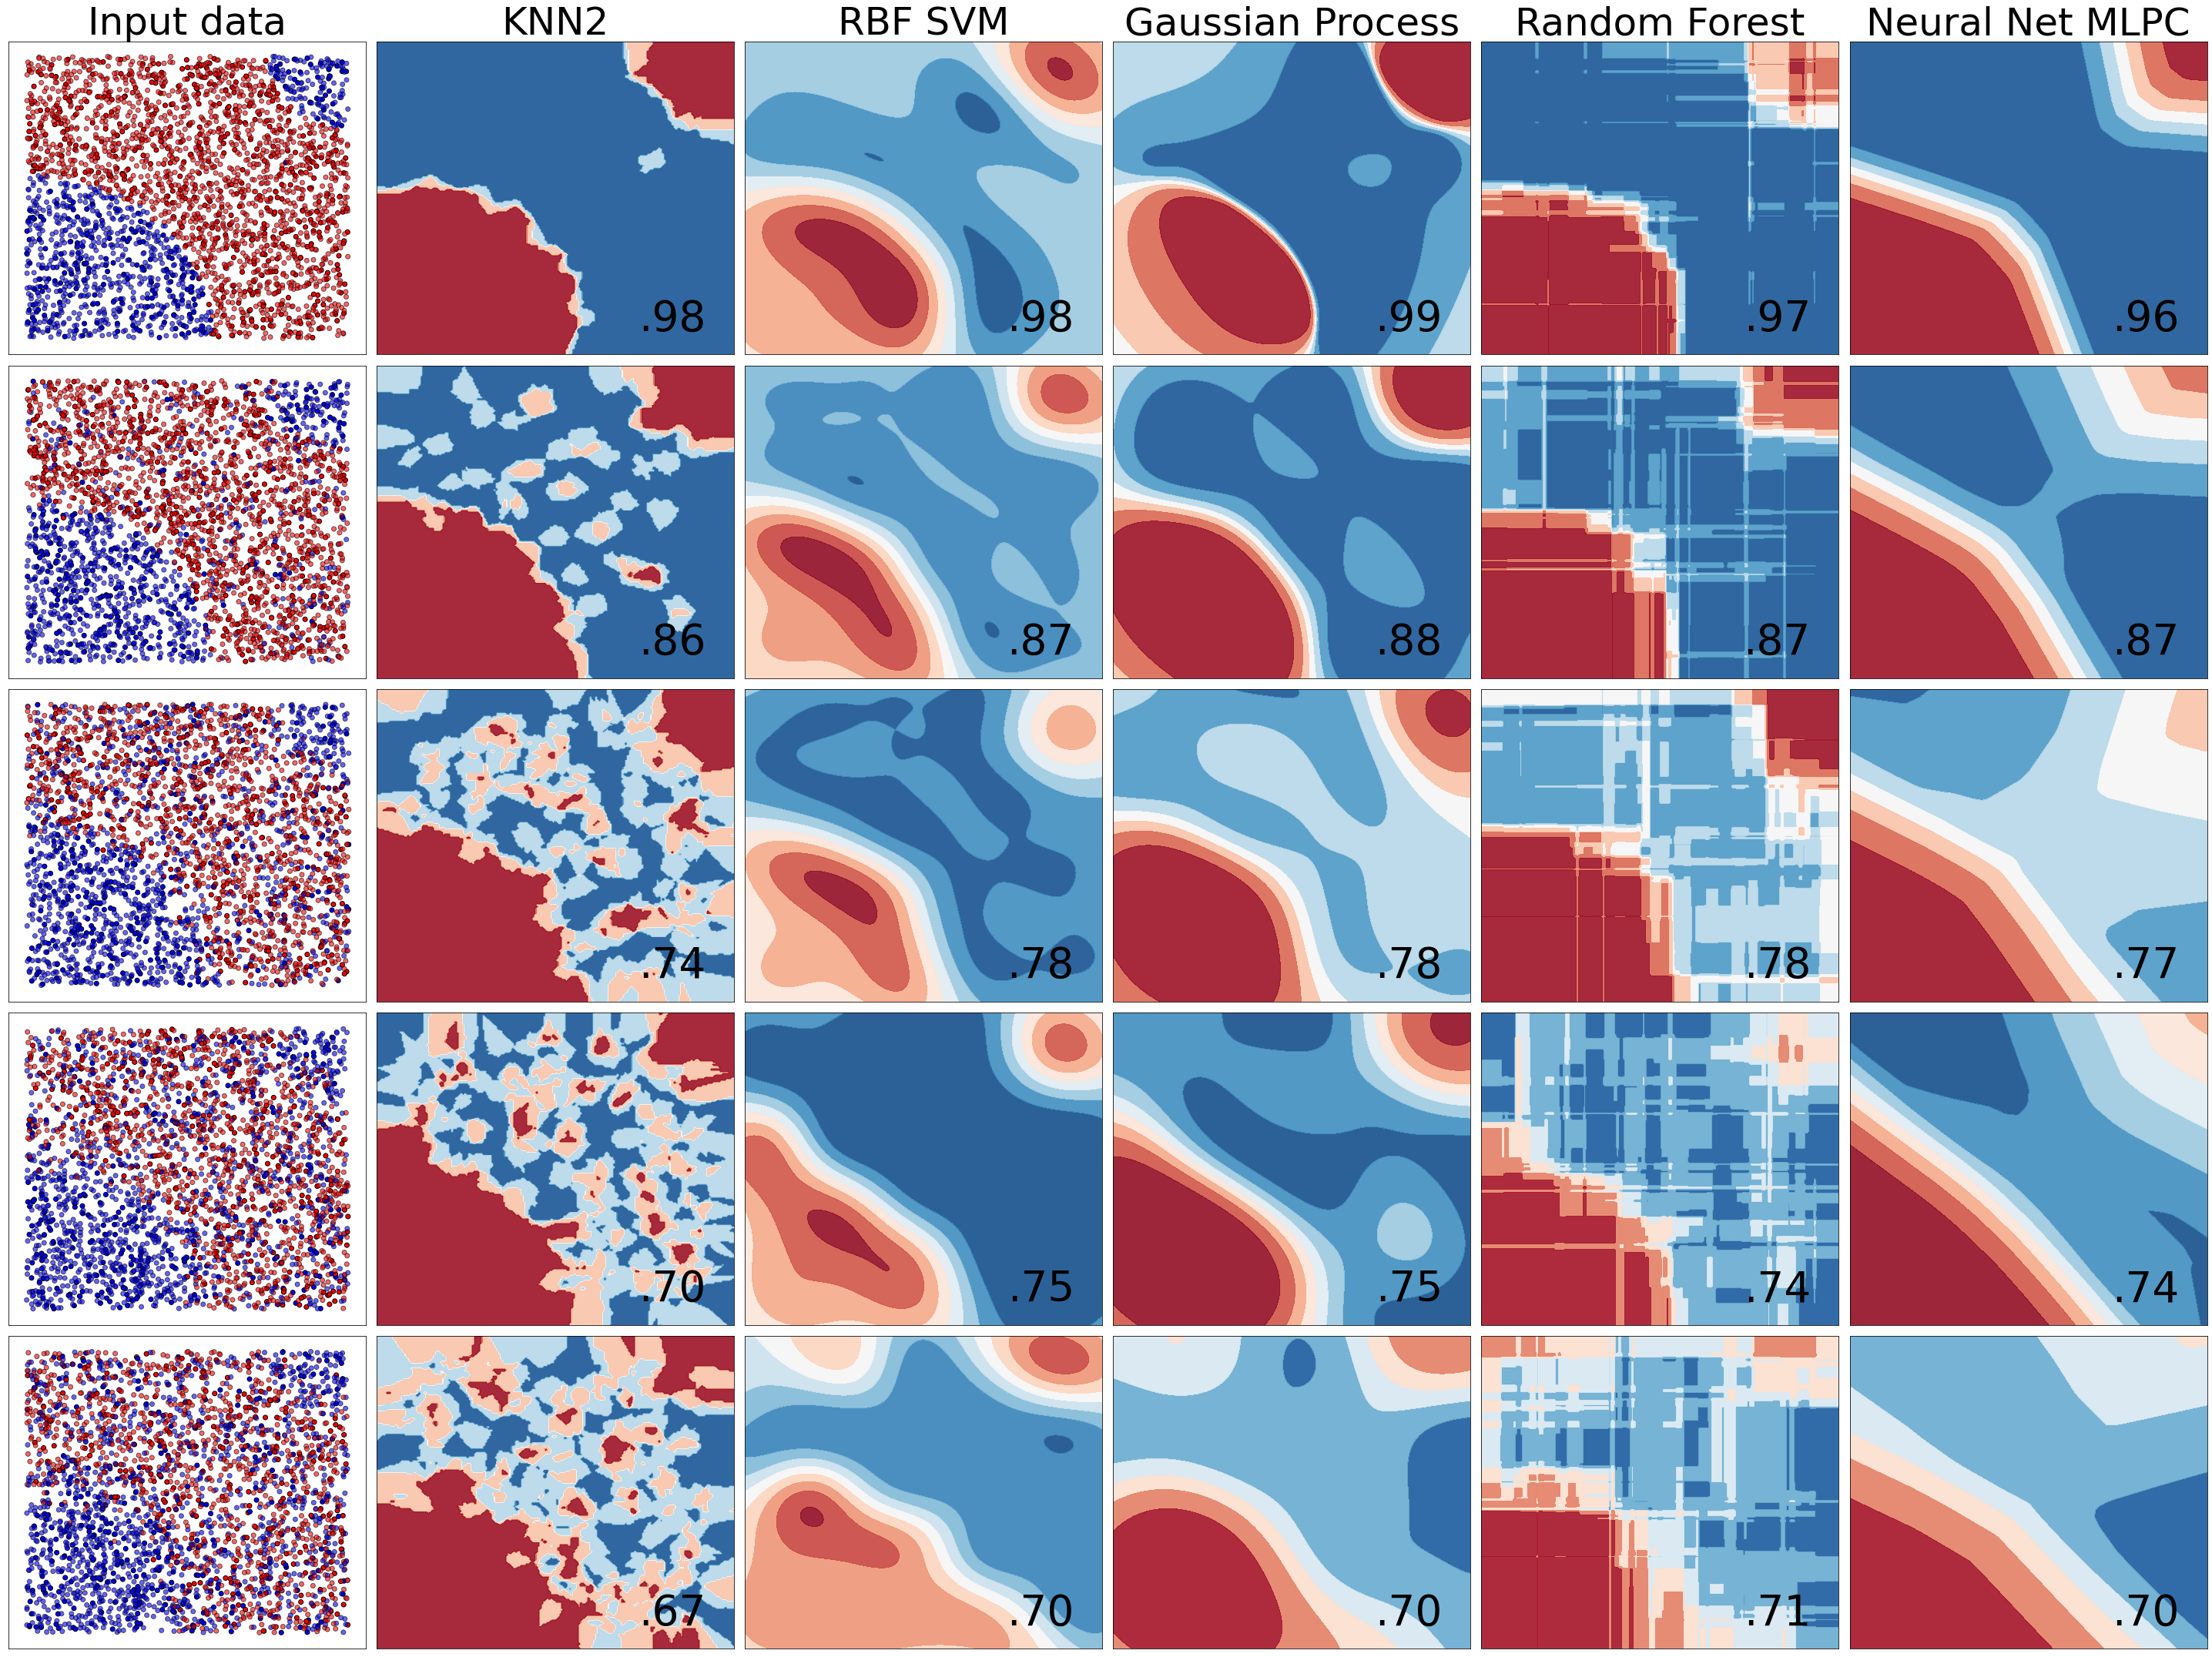

In [52]:
classifiers = [
    KNeighborsClassifier(3),
    SVC(gamma=2, C=1),
    GaussianProcessClassifier(1.0 * RBF(1.0)),
    RandomForestClassifier(max_depth=5, n_estimators=10, max_features=1),
    MLPClassifier(alpha=1, max_iter=1000)]

auc1 = [[0 for i in range(len(datasets)+2)] for j in range(len(names)+2)]

names = ["KNN2",  "RBF SVM", "Gaussian Process", "Random Forest", "Neural Net MLPC", ]

figure = plt.figure(figsize=(40, 30))
i = 1
j = 0
k = 0
# iterate over datasets
   # just plot the dataset first
cm = plt.cm.RdBu_r
cm_bright = ListedColormap(['#FF0000', '#0000FF'])



for ds_cnt,ds in enumerate(datasets):
    k = k +1
    # preprocess dataset, split into training and test part
    X = loadtxt("X_N"+str(ds)+".csv", delimiter=',')
    y = loadtxt("y_N"+str(ds)+".csv", delimiter=',')
    X = StandardScaler().fit_transform(X)
    X_train, X_test, y_train, y_test = \
    train_test_split(X, y, test_size=0.8, random_state=42)

    x_min, x_max = X[:, 0].min() - .2, X[:, 0].max() + .2
    y_min, y_max = X[:, 1].min() - .2, X[:, 1].max() + .2
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

 # just plot the dataset first
    cm = plt.cm.RdBu_r
    cm_bright = ListedColormap(['#FF0000', '#0000FF'])
    ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
    if ds_cnt == 0:
        ax.set_title("Input data",size=50)
    # Plot the training points
    ax.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=cm_bright,
               edgecolors='k')
    # Plot the testing points
    ax.scatter(X_test[:, 0], X_test[:, 1], c=y_test, cmap=cm_bright, alpha=0.6,
               edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xticks(())
    ax.set_yticks(())
    i += 1
    j=0

    
    
    # iterate over classifiers
    for name, clf in zip(names, classifiers):
        j += 1
        ax = plt.subplot(len(datasets), len(classifiers) + 1, i)
        clf.fit(X_train, y_train)
#       score = clf.score(X_test, y_test)
        aucscore=roc_auc_score(y, clf.predict(X))
        print(aucscore)
        
        auc1[j][k]=aucscore
        
        
        # Plot the decision boundary. For that, we will assign a color to each
        # point in the mesh [x_min, x_max]x[y_min, y_max].
        if hasattr(clf, "decision_function"):
            Z = clf.decision_function(np.c_[xx.ravel(), yy.ravel()])
        else:
            Z = clf.predict_proba(np.c_[xx.ravel(), yy.ravel()])[:, 1]
            

        # Put the result into a color plot
        Z = Z.reshape(xx.shape)
        ax.contourf(xx, yy, Z, cmap=cm, alpha=0.9)

        plt.scatter(
        X_train[:, 0][y_train == 1],
        X_train[:, 1][y_train == 1],
        c="r",s=0,
        marker="o",
        edgecolors="k",
        label="class 1 Train",
        )
        plt.scatter(
        X_train[:, 0][y_train == 0],
        X_train[:, 1][y_train == 0],
        c="b",
        marker="o",s=0,
        edgecolors="k",
        label="class 0 train",
        )

        ax.set_xlim(xx.min(), xx.max())
        ax.set_ylim(yy.min(), yy.max())
        ax.set_xticks(())
        ax.set_yticks(())
        if ds_cnt == 0:
            ax.set_title(name,size=50)
        ax.text(xx.max() - .3, yy.min() + .3, ('%.2f' % aucscore).lstrip('0'),
                size=55, horizontalalignment='right')
        i += 1

plt.tight_layout()
plt.show()

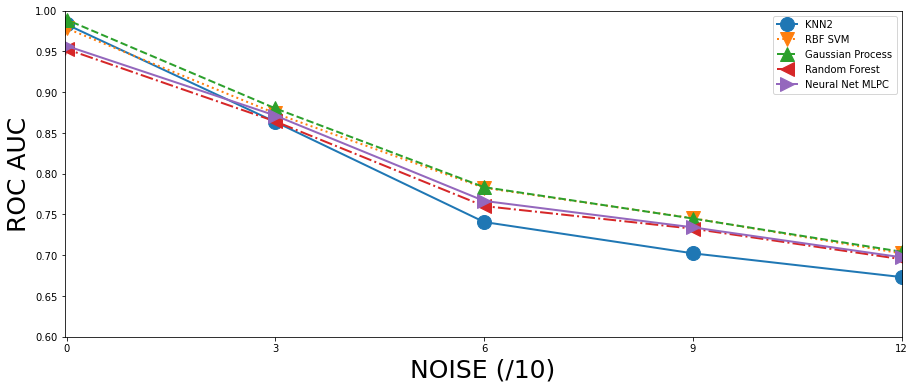

In [48]:
figure = plt.figure(figsize=(15, 6))
plt.plot(auc1[1], label='KNN2',marker = "o", linestyle= "solid", linewidth = 2,
        markersize = 14)
plt.plot(auc1[2], label='RBF SVM',marker = "v", linestyle= "dotted", linewidth = 2,
        markersize = 14)
plt.plot(auc1[3], label='Gaussian Process',marker = "^", linestyle= "dashed", linewidth = 2,
        markersize = 14)
plt.plot(auc1[4], label='Random Forest',marker = "<", linestyle= "dashdot", linewidth = 2,
        markersize = 14)
plt.plot(auc1[5], label='Neural Net MLPC',marker = ">", linestyle= "-", linewidth = 2,
        markersize = 14)


#plt.plot(auc1[5], label='6')
plt.xlabel('NOISE (/10)',fontsize=25)
plt.ylabel('ROC AUC',fontsize=25)
plt.title('')
plt.legend(loc="upper right")
plt.xlim([0.99, 1])
plt.xticks([1,2,3,4,5],['0','3','6','9','12']) 
plt.ylim([0.6, 1])
plt.show()